# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __Some Brief Notes on Bayesian Credibility Intervals__ <br>

Author:  Tyler J. Brough <br>
Updated: April 13, 2022 <br>

---

<br>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
## set the prng seed value
np.random.seed(123456)

<br>
<br>

## __Credibility Intervals__

<br>

* In this notebook we take a look at so-called Bayesian Credibility Intervals or Highest Density Intervals

* For the Bayesian a credibility interval is an alternative to the Frequentist Confidence Interval

* Recall that a confidence interval is of the following form

<br>
<br>

$$
{\Large L,U = pe \pm cv \times se}
$$

<br>
<br>

Where:

* $pe$ is a point estimate

* $cv$ is the critical value

* $se$ is the standard error of the point estimate

<br>

The interpretation of the Frequentist confidence interval was important: 

* "$95\%$ of similarly constructed intervals will contain the true mean"

* __NOT:__ "the probability that the true mean lies between $L$ and $U$ is $0.95$"

<br>

The Bayesian case is different. Because we obtain a posterior distribution through updating the prior via Bayes' Rule, we can make a probability statement. 

<br>

* Use the CDF of the posterior to find $L$ and $U$ such that

<br>
<br>

$$
{\Large F(U) - F(L) = 0.95}
$$

<br>
<br>

* A Bayesian credibility interval is any such interval

* Some textbooks reserve the phrase _"Highest Density Interval"_ (HDI) for the shortest such interval (which is obivously optimal)

* Also, note that it need not be the case that the HDI will have equal weight in the left and right tails of the distribution.

* A procedure that selects $L$ and $U$ such that there is equal weight in the two tails would be called an _"equal tail interval"_ (ETI)

* An ETI is a credible interval, but not necessarily (and probably not) an HDI

* Nevertheless, for simplicity sake, we will define the credibility interval as the ETI for comparison with the frequentist confidence interval

<br>

### __The Beta-Binomial Conjugate Model__

<br>

Let's return to the Beta-Binomial conjugate model to have a specific model to work with.

<br>

Recal that:

* The prior was: $\theta \sim Beta(a, b)$ 

* Where $a$ and $b$ are the prior hyperparameters

* The posterior was: $\theta | x \sim Beta(a^{\ast}, b^{\ast})$

* Where $a^{\ast}$ and $b^{\ast}$ are the posterior hyperparameters

* __NB:__ these hyperparameters implicitly representing the updating process via Bayes's Rule (by definition of a conjugate model)

* The likelihood function was $x \sim Binom(n, \theta)$

<br>

In [3]:
## Let's simulate some data from this model


## Define "true" theta
θ = 0.8

## Define the sample size
n = 10

## Generate the data according to the likelihood
x = np.random.binomial(n=1, p=θ, size=n)

In [4]:
x

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [5]:
## Helper function to plot Beta priors
def plot_beta(a=1, b=1):
    x = np.linspace(0, 1, 1000)
    y = stats.beta.pdf(x, a, b)
    plt.plot(x, y, lw = 2.0, color='darkblue', alpha=0.8)
    plt.fill_between(x, y, facecolor='orange', alpha=0.5)
    plt.title(f"Beta({a},{b}) Prior Distribution")
    plt.show()

In [6]:
## Define the prior (flat or uniformative prior)
a = 1.0
b = 1.0

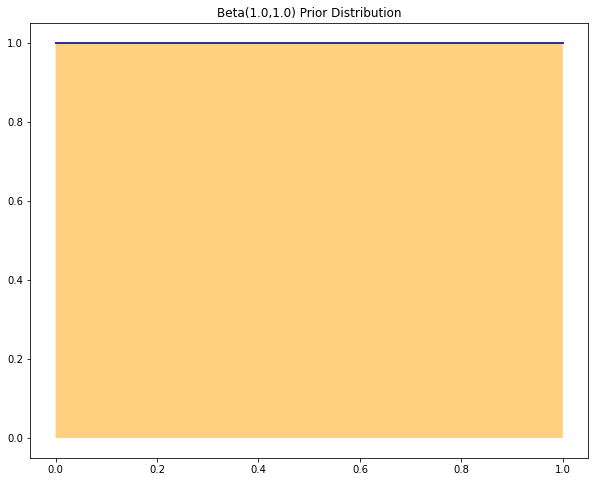

In [7]:
## Plot the prior
plot_beta(a, b)

In [8]:
## Update via Bayes's Rule to get the posterior
N1 = np.sum(x)
N0 = n - np.sum(x)
a_star = a + N1
b_star = b + N0

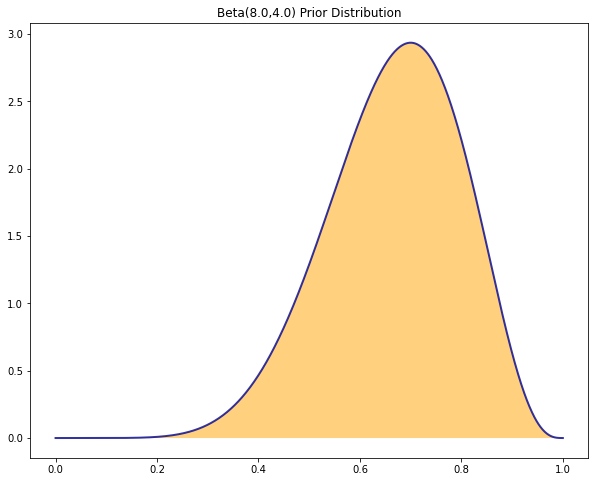

In [9]:
## Plot the posterior
plot_beta(a_star, b_star)

In [10]:
## A 95% Bayesian Credible Interval (ETI)
U = stats.beta(a_star, b_star).ppf(0.975)
L = stats.beta(a_star, b_star).ppf(0.025)
(L, U)

(0.39025744042757876, 0.8907365561809019)

### __Compare to a Frequentist CI__

In [11]:
## Calculate the mean (point estimate)
x̄ = np.mean(x)
x̄

0.7

In [12]:
## Get the critical value from a Student T distribution
tc = stats.t(n-1).ppf(0.975)

## Get the standard error of the mean
se = np.std(x, ddof=1) / np.sqrt(n)

In [13]:
## Form the CI
ci = (x̄ - tc * se, x̄ + tc * se)
ci

(0.35444978559509566, 1.0455502144049043)

<br>

### __Comparison__

<br>

Some questions:

1. How does the Bayesian 95% credibility interval compare with the Frequentist 95% confidence interval?

2. What happens if we work with an informative Bayesian prior rather than an uniformative prior? 
    - How would you test this? 
    - I leave this to you as an exercise

<br>